Physics Task for Datascientist : Tom Olschewski    

Task a)

In [139]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time

In [152]:
def d_t(t):
    return 64*math.sqrt(2)*(((t%500)/500) - 1/2)

def illuminated(xv, yv, orientation, t):
    theta = math.radians(orientation[(int(t // 500 % 8))])
    return abs(math.cos(theta)*xv + math.sin(theta)*yv - d_t(t)) < 5

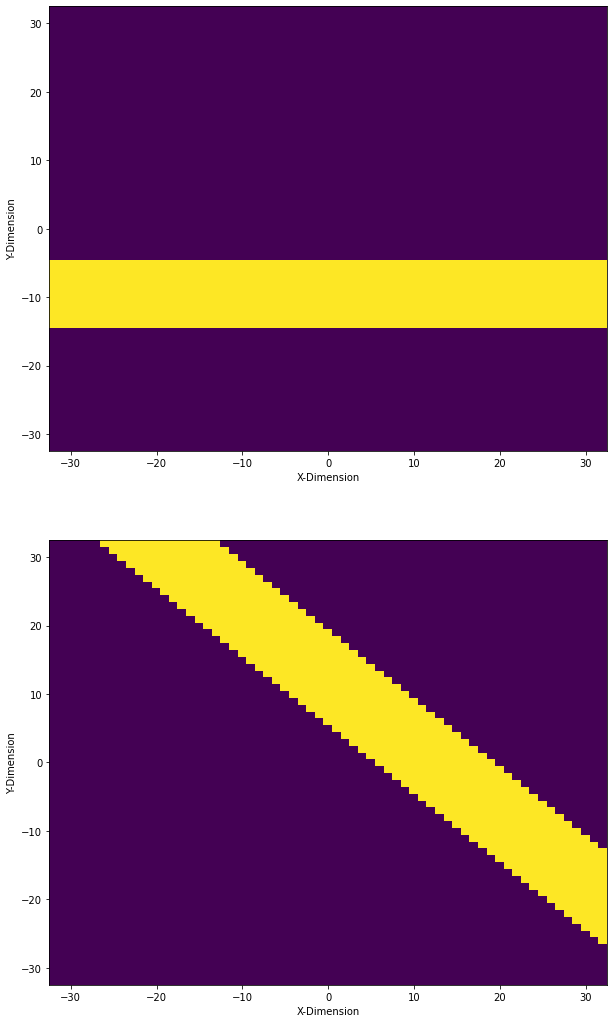

In [311]:
orientation = [0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5]
times = np.array([22.2, 33.3]) * 1000

x = np.arange(-32, 33)
y = np.arange(-32, 33)
xv, yv = np.meshgrid(x, y)

fig, axis = plt.subplots(2, figsize=(10, 18))

for i in range(0, len(times)):

    f = illuminated(xv, yv, orientation, times[i])
    axis[i].pcolor(xv, yv, f)
    axis[i].set_xlabel('X-Dimension')
    axis[i].set_ylabel('Y-Dimension')
plt.show()

Task b)
#Scatterplot version

In [142]:
cell_0_data = np.loadtxt("cell0.txt", dtype=int)
cell_0_orientation = cell_0_data // 500 % 8

neural_data = np.vstack((cell_0_data % 500, cell_0_orientation)).T
neural_data = neural_data[neural_data[:, 1].argsort()]

Text(0, 0.5, 'Orientation Index')

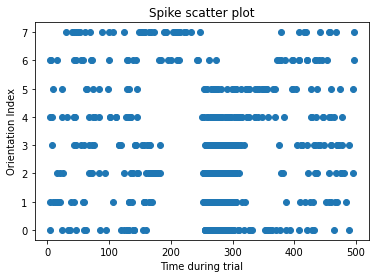

In [143]:
plt.scatter(neural_data[:,0], neural_data[:,1])
plt.title('Spike scatter plot')
plt.xlabel('Time during trial')
plt.ylabel('Orientation Index')

In [144]:
import pandas as pd

df = pd.read_csv('cell0.txt', names=['Spikes'])
df['orientation'] = df['Spikes'] // 500 % 8
df['Spikes'] =  df['Spikes'] % 500

df.sort_values(['orientation'], ascending = True)
#I gave up trying to use list comprehensions because I just couldn't get it to work. Hence this ugly but functioning version.
spikes = [np.array(df.loc[df['orientation'] == 0].iloc[:,0].values), np.array(df.loc[df['orientation'] == 1].iloc[:,0].values), np.array(df.loc[df['orientation'] == 2].iloc[:,0].values), np.array(df.loc[df['orientation'] == 3].iloc[:,0].values), 
          np.array(df.loc[df['orientation'] == 4].iloc[:,0].values), np.array(df.loc[df['orientation'] == 5].iloc[:,0].values), np.array(df.loc[df['orientation'] == 6].iloc[:,0].values), np.array(df.loc[df['orientation'] == 7].iloc[:,0].values)]

Text(0.5, 0, 'Time during Trial')

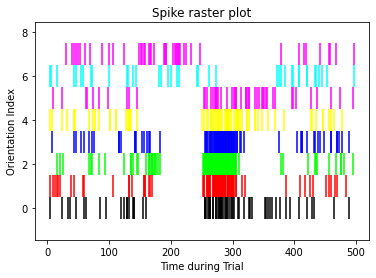

In [145]:
colorCodes = np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1],
                        [1, 1, 0],
                        [1, 0, 1],
                        [0, 1, 1],
                        [1, 0, 1]])

plt.eventplot(spikes, color=colorCodes)  
plt.title('Spike raster plot')
plt.ylabel('Orientation Index') 
plt.xlabel('Time during Trial')

Task c)


In [159]:
#calculating the Spike-triggered-Average
#with mean subtraction, I belive something went wrong
def spike_triggered_average_mean(df, xv, yv):
    n = len(df['Spikes'])
    time = np.arange(0, 39724, 1)
    sum = 0

    mean = 0
    for t in time:
        mean =+ illuminated(xv, yv, orientation, t)

    for t in time:
        if activation(t, df) == True:
            sum += (illuminated(xv, yv, orientation, t) -mean)* activation(t, df)

    sum - np.mean(sum)

    return 1/n * sum

#without mean subtraction
def spike_triggered_average(df, xv, yv):
    n = len(df['Spikes'])
    time = np.arange(0, 40000, 1)
    sum = 0

    for t in time:
        if activation(t, df) == True:
            sum += illuminated(xv, yv, orientation, t)

    return 1/n * sum

def activation(t, df):
    return t in df['Spikes'].values


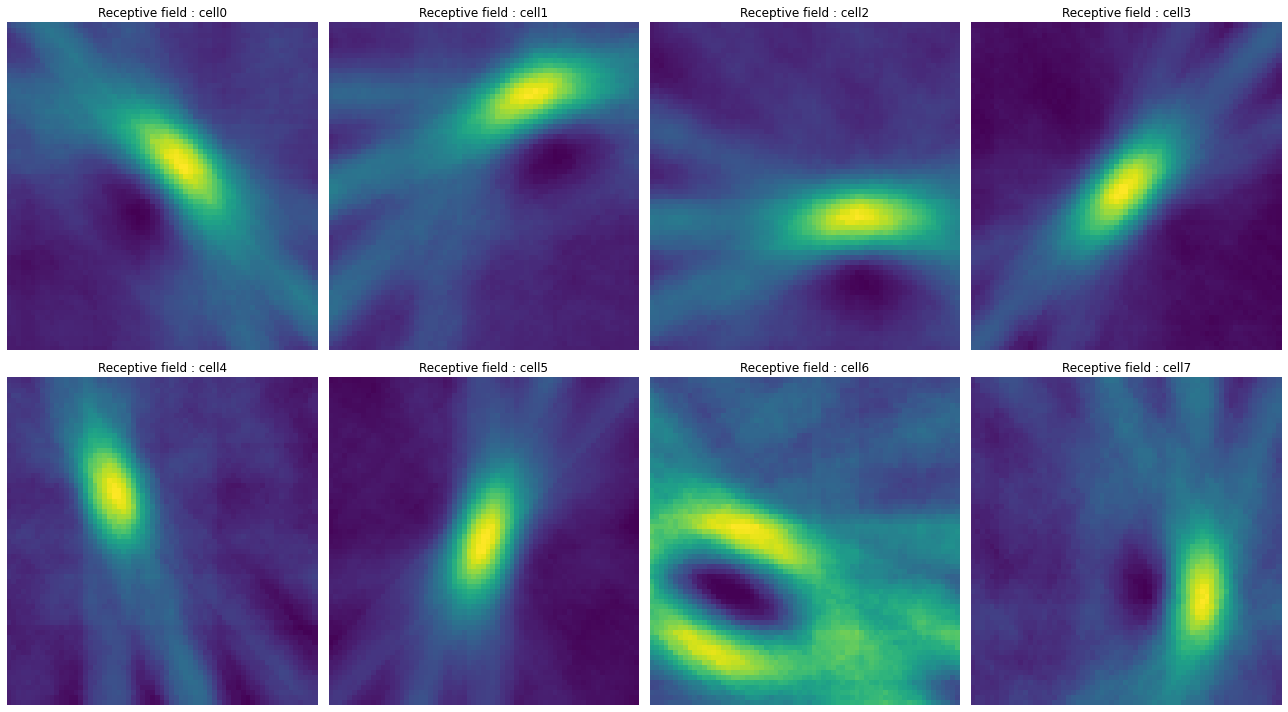

In [194]:
# read all cells into cells array
cells = [pd.read_csv('cell0.txt', names=['Spikes']), pd.read_csv('cell1.txt', names=['Spikes']), pd.read_csv('cell2.txt', names=['Spikes']), pd.read_csv('cell3.txt', names=['Spikes'])
         , pd.read_csv('cell4.txt', names=['Spikes']), pd.read_csv('cell5.txt', names=['Spikes']), pd.read_csv('cell6.txt', names=['Spikes']), pd.read_csv('cell7.txt', names=['Spikes'])] #reread the database to undo previous modification

count = 0
xaxis = 0

fig, axis = plt.subplots(2, 4, figsize=(18, 10))


for cell in cells:
    STA = spike_triggered_average(cell, xv, yv)
    #STA_mean = spike_triggered_average_mean(cell, xv, yv)

    #plotting
    axis[int(xaxis//1)][count%4].pcolor(xv, yv, STA)
    axis[int(xaxis//1)][count%4].set_title(f'Receptive field : cell{count}')
    axis[int(xaxis//1)][count%4].axis('off')


    # poor attempt to subtract the mean, decided wasn't necessary
    #plt.pcolor(xv, yv, STA_mean)
    #plt.colorbar()
    #plt.title(f'Receptive field with mean subtraction : cell{count}')
    #plt.xlabel('X-Dimension')
    #plt.ylabel('Y-Dimension')
    #plt.show()
    xaxis += 0.25
    count += 1

plt.tight_layout()
plt.show()

Task d)

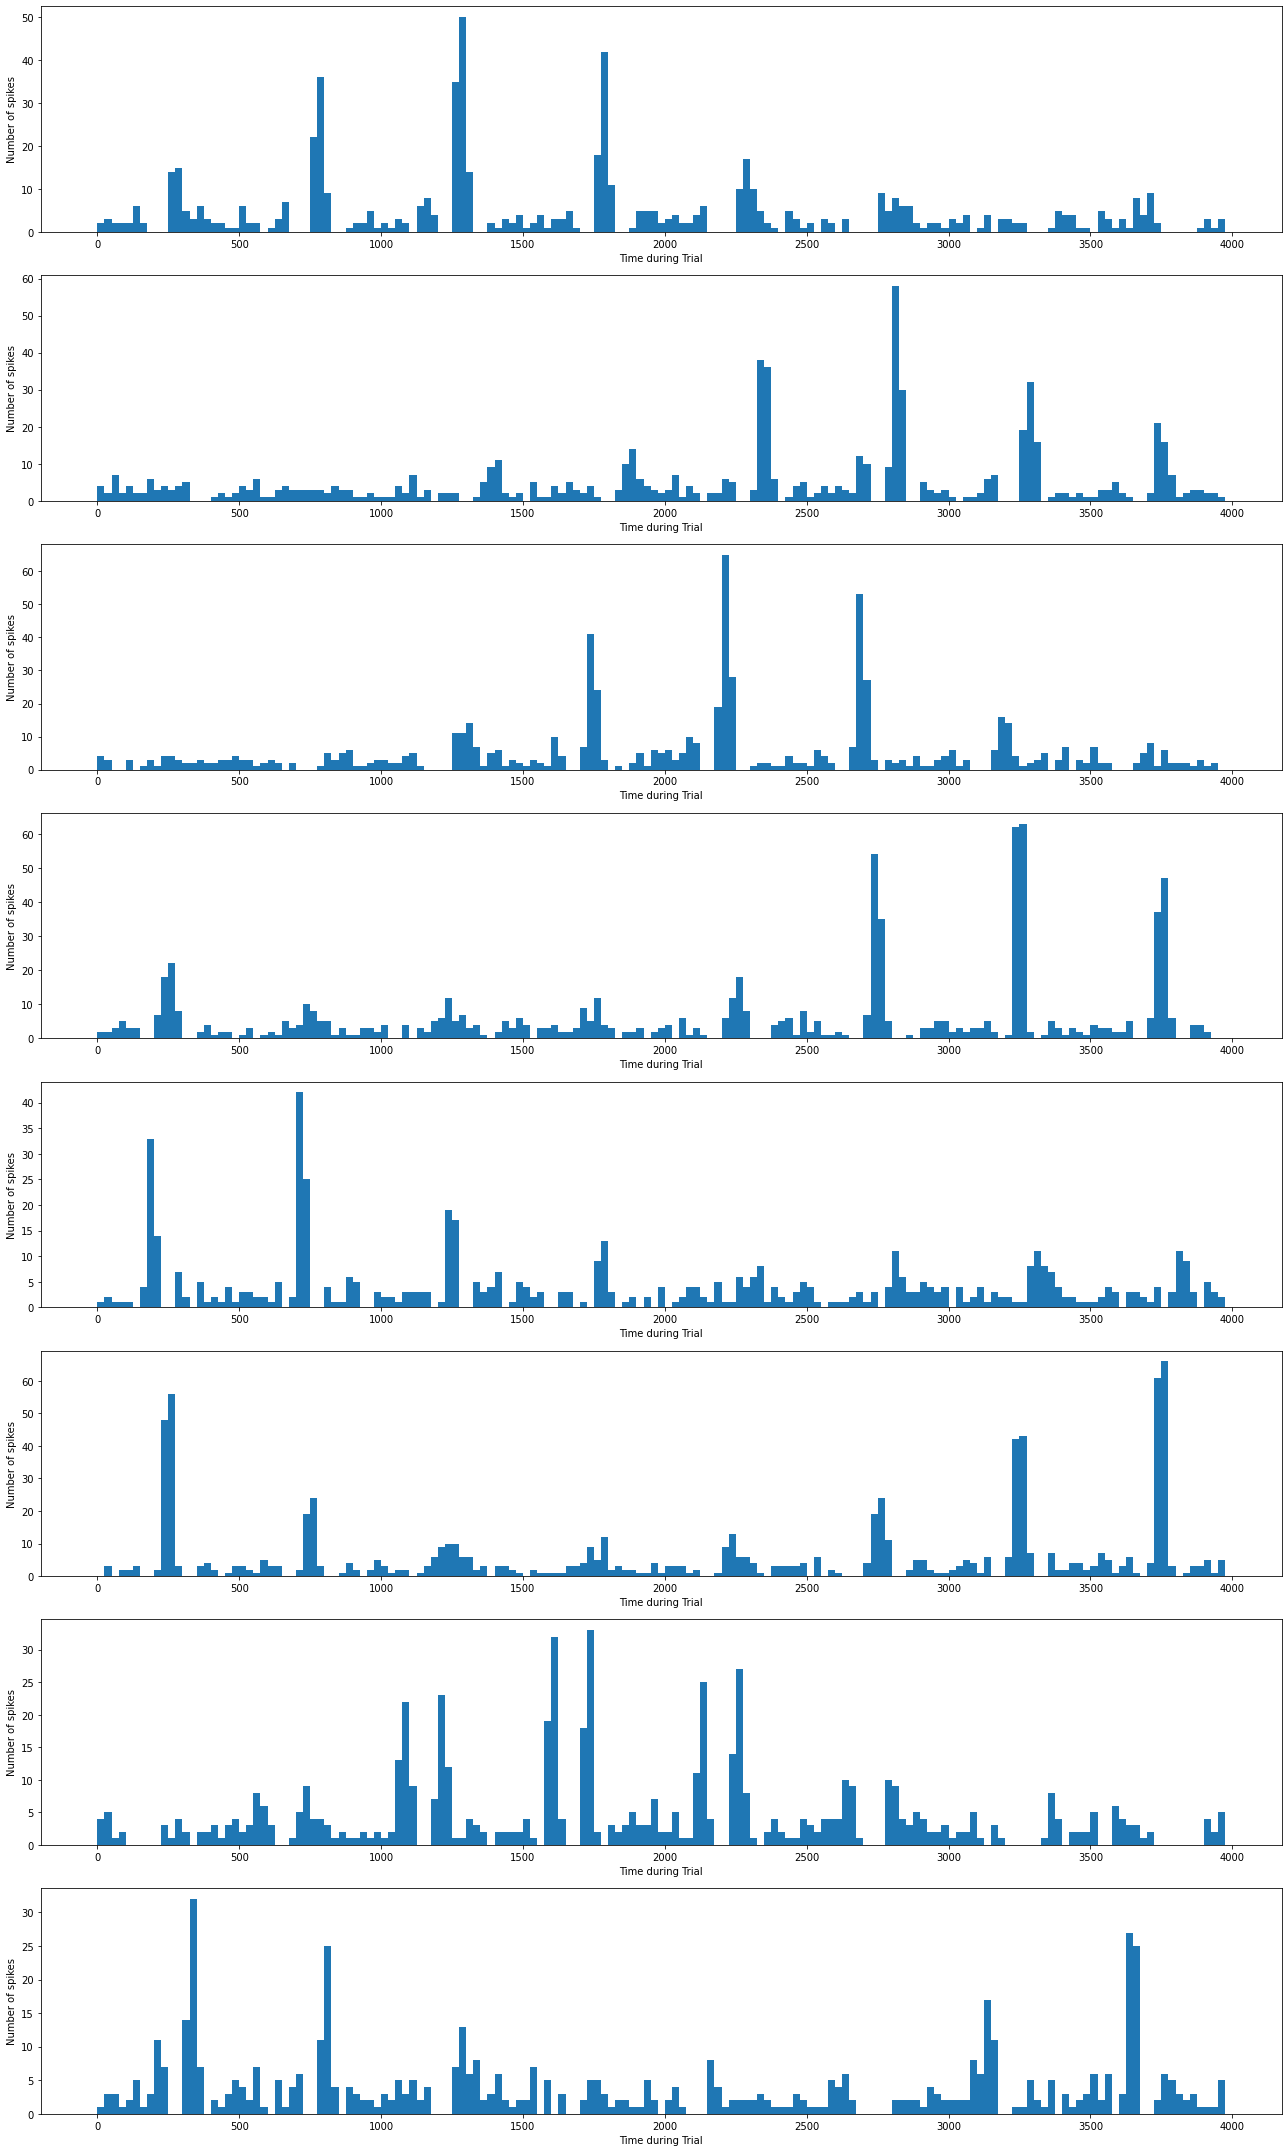

In [200]:
fig, axis = plt.subplots(8, figsize=(18, 30))

# we do modulo 4000 since it repeats after that time
for i in range(0, 8):
    axis[i].hist(cells[i]['Spikes'] % 4000, bins=[i for i in range(0, 4000, 25)])
    axis[i].set_xlabel('Time during Trial')
    axis[i].set_ylabel('Number of spikes')
    
plt.tight_layout()
plt.show()

Task e)

In [297]:
#define function to get max bins for each orientation for a given cell
def get_max_bin(cell):
    maximum = []
    #loop through all orientations and create the 20 bins for each
    for i in range(0, 4000, 500):
        bins = [i for i in range(i, i+501, 25)]
        temp = []
        # get the number of values that lie in between neighbouring bins
        for j in range(0, len(bins)-1):
            temp.append((cell['Spikes']%4000).between(left=bins[j], right=bins[j+1]).sum())
            
        maximum.append(max(temp))
    return maximum


Cell0 shows maximum stimulation at a angle of 45 degree!
Cell1 shows maximum stimulation at a angle of 112.5 degree!
Cell2 shows maximum stimulation at a angle of 90 degree!
Cell3 shows maximum stimulation at a angle of 135 degree!
Cell4 shows maximum stimulation at a angle of 22.5 degree!
Cell5 shows maximum stimulation at a angle of 157.5 degree!
Cell6 shows maximum stimulation at a angle of 67.5 degree!
Cell7 shows maximum stimulation at a angle of 0 degree!


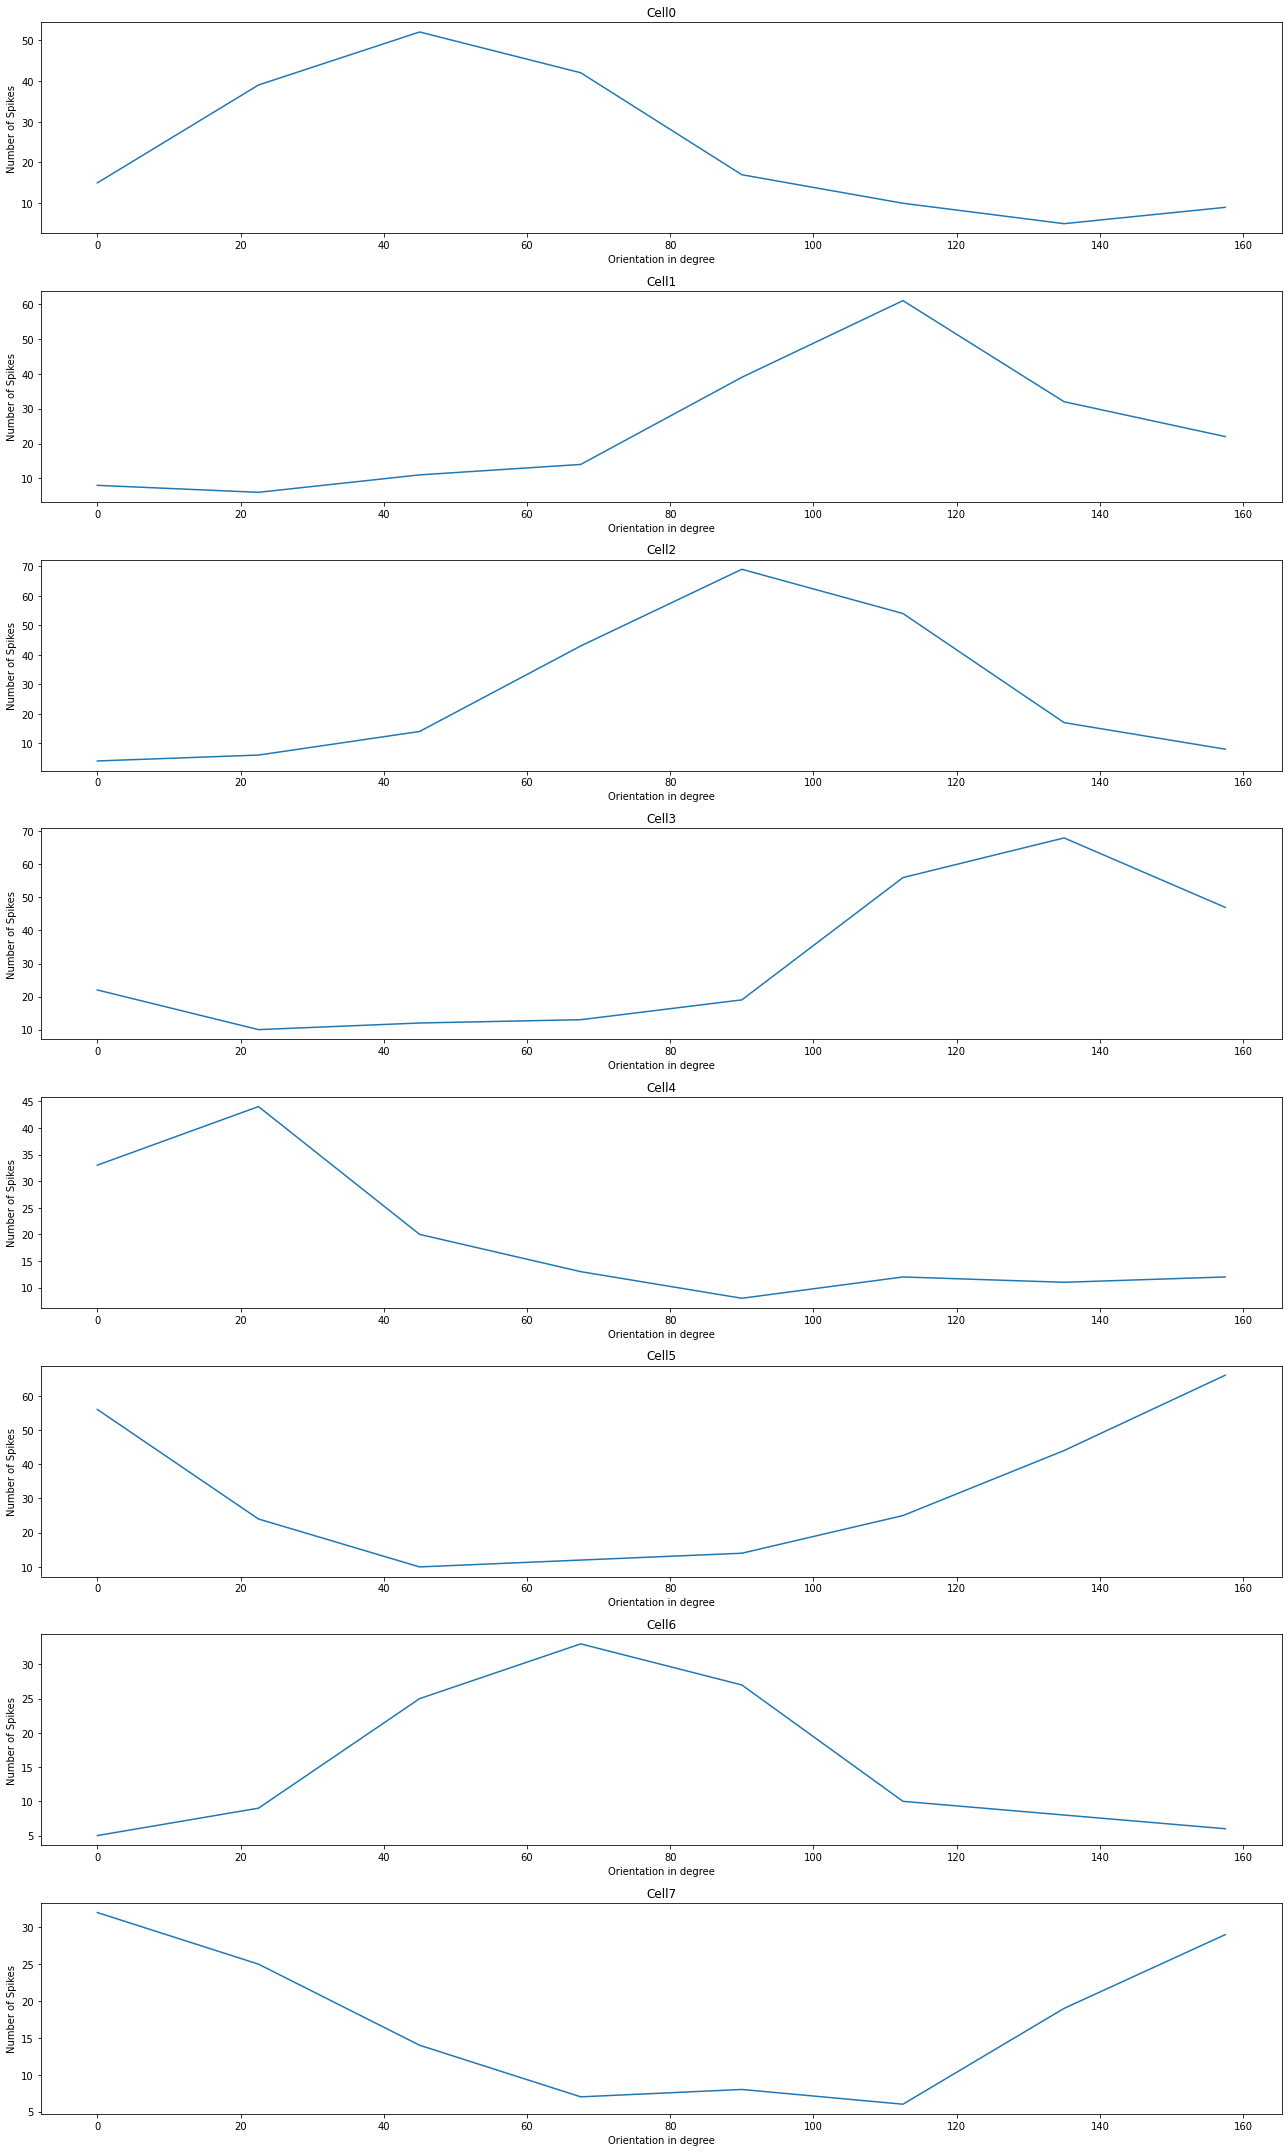

In [304]:
fig, axis = plt.subplots(8, figsize=(18, 30))

for i in range(0, len(cells)):
    cell_maximums = get_max_bin(cells[i])
    print(f'Cell{i} shows maximum stimulation at a angle of {orientation[cell_maximums.index(max(cell_maximums))]} degree!')
    axis[i].plot(orientation , cell_maximums)
    axis[i].set_title(f'Cell{i}')
    axis[i].set_xlabel('Orientation in degree')
    axis[i].set_ylabel('Number of Spikes')

plt.tight_layout()
plt.show()

Didn't have sufficient time to work on task f).